In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats

C:\Users\Rahul\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang',  'ca', 

In [5]:
numerical_columns = list(df.loc[:,['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
categorical_columns = list(df.loc[:,['sex', 'cp', 'fbs', 'restecg','exang','slope','ca','thal']])

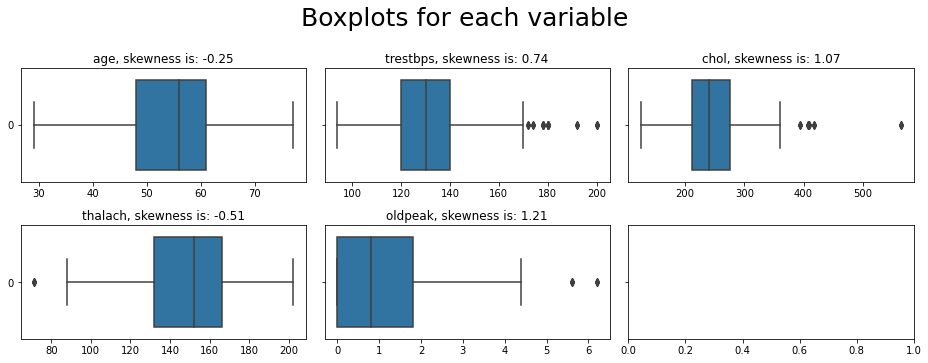

In [6]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numerical_columns, rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [7]:
z_scores = np.abs(stats.zscore(df))
threshold = 3
outlier_indices = np.where(z_scores > threshold)
df = df.drop(outlier_indices[0], axis=0)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,969.000000,969.000000,969.000000,969.00000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,54.417957,0.701754,0.948400,130.98968,244.467492,0.143447,0.532508,149.308566,0.337461,1.034572,1.398349,0.681115,2.325077,0.518060
std,9.074174,0.457724,1.035237,16.94101,46.125807,0.350709,0.529332,22.590880,0.473088,1.092665,0.608342,0.929578,0.593178,0.499932
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.00000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.00000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


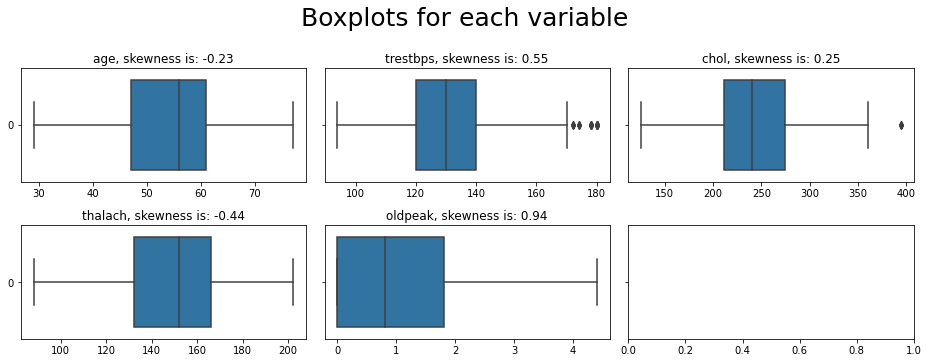

In [9]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numerical_columns, rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [10]:
x=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [11]:
y=df['target']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss=StandardScaler()

In [16]:
x_train=ss.fit_transform(x_train)

In [17]:
x_test=ss.fit_transform(x_test)

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

In [19]:
Exc=ExtraTreesClassifier(max_features=3,min_samples_split=4,n_estimators=512,n_jobs=1,warm_start=True,random_state=2529)

In [20]:
Exc.fit(x_train,y_train)

ExtraTreesClassifier(max_features=3, min_samples_split=4, n_estimators=512,
                     n_jobs=1, random_state=2529, warm_start=True)

In [21]:
y_pred_exc=Exc.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
print(classification_report(y_test,y_pred_exc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       146
           1       1.00      0.98      0.99       145

    accuracy                           0.99       291
   macro avg       0.99      0.99      0.99       291
weighted avg       0.99      0.99      0.99       291



In [24]:
confusion_matrix(y_test,y_pred_exc)

array([[146,   0],
       [  3, 142]], dtype=int64)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr=LogisticRegression()

In [27]:
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred_lr=lr.predict(x_test)

In [29]:
confusion_matrix(y_test,y_pred_lr)

array([[117,  29],
       [ 12, 133]], dtype=int64)

In [30]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       146
           1       0.82      0.92      0.87       145

    accuracy                           0.86       291
   macro avg       0.86      0.86      0.86       291
weighted avg       0.86      0.86      0.86       291



In [31]:
confusion_matrix(y_test,y_pred_lr)

array([[117,  29],
       [ 12, 133]], dtype=int64)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier()

In [34]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred_knn=knn.predict(x_test)

In [36]:
confusion_matrix(y_test,y_pred_knn)

array([[119,  27],
       [ 14, 131]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       146
           1       0.83      0.90      0.86       145

    accuracy                           0.86       291
   macro avg       0.86      0.86      0.86       291
weighted avg       0.86      0.86      0.86       291



In [38]:
input_data=(52,1,0,125,212,0,1,168,0,1.0,2,2,3)

#changing the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance 
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=Exc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("This Person is Healthy Dont have Heart Disease")
else:
    print("This Person has Heart Disease")


[0]
This Person is Healthy Dont have Heart Disease


In [39]:
import pickle
filename='heart_disease.sav'
pickle.dump(Exc,open(filename,'wb'))

In [40]:
#Loading the saved model
loaded_model=pickle.load(open('heart_disease.sav','rb'))

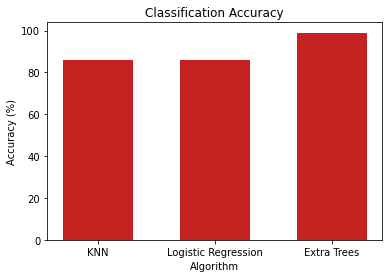

In [41]:
import matplotlib.pyplot as plt


knn_accuracy = 86
logistic_regression_accuracy = 86
extra_trees_classifier_accuracy = 99
fig, ax = plt.subplots()


ax.bar(['KNN', 'Logistic Regression', 'Extra Trees'], 
        [knn_accuracy, logistic_regression_accuracy, extra_trees_classifier_accuracy], 
        color='#C62121',width=0.6)



# Add a title and axis labels
plt.title('Classification Accuracy')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')

# Show the plot
plt.show()
